In [201]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression

In [202]:
df = pd.read_csv('data.csv')
#df.drop(columns=['Unix Timestamp','Symbol'],inplace=True)
df.dropna(inplace=True) #drop nulls

In [203]:
#df.head(10000).to_csv('data.csv')

In [204]:

df['Change']=df.apply(lambda row: (row.Close-row.Open)/row.Close*100, axis=1)
df['Dates'] = pd.to_datetime(df['Timestamp'], unit='s')
df.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Change,Dates
0,0,0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.000000,2011-12-31 07:52:00
1,1,1,478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.000000,2011-12-31 15:50:00
2,2,2,547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,1.531729,2011-12-31 16:59:00
3,3,3,548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.000000,2011-12-31 17:00:00
4,4,4,1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.000000,2012-01-01 04:16:00
5,5,5,1896,1325431680,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000,0.000000,2012-01-01 15:28:00
6,6,6,2333,1325457900,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000,0.000000,2012-01-01 22:45:00
7,7,7,3612,1325534640,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,0.000000,2012-01-02 20:04:00
8,8,8,4553,1325591100,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000,0.000000,2012-01-03 11:45:00
9,9,9,4710,1325600520,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000,0.000000,2012-01-03 14:22:00


In [205]:
df=df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
df.head(10)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Change,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.000000,2011-12-31 07:52:00
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.000000,2011-12-31 15:50:00
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,1.531729,2011-12-31 16:59:00
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.000000,2011-12-31 17:00:00
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.000000,2012-01-01 04:16:00
5,1325431680,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000,0.000000,2012-01-01 15:28:00
6,1325457900,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000,0.000000,2012-01-01 22:45:00
7,1325534640,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,0.000000,2012-01-02 20:04:00
8,1325591100,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000,0.000000,2012-01-03 11:45:00
9,1325600520,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000,0.000000,2012-01-03 14:22:00


In [206]:
#df.drop(df[df['Change'] < 100].index, inplace = True)
df.dropna(inplace=True) #drop nulls
df.head(10)
df.nsmallest(10, 'Change')

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Change,Dates
9739,1345232160,14.68,14.68,13.22,13.22,7.295131,103.741625,14.220667,-11.043873,2012-08-17 19:36:00
9580,1345191120,16.41,16.41,15.01,15.01,46.402803,747.470000,16.108294,-9.327115,2012-08-17 08:12:00
9586,1345191480,16.39,16.39,15.00,15.00,27.408728,449.135000,16.386568,-9.266667,2012-08-17 08:18:00
9758,1345233780,12.97,12.97,12.00,12.00,20.174690,242.265729,12.008399,-8.083333,2012-08-17 20:03:00
9746,1345232820,13.04,13.04,12.07,12.07,570.000000,7172.341955,12.583056,-8.036454,2012-08-17 19:47:00
9756,1345233660,12.98,12.98,12.02,12.02,1.481692,17.963139,12.123400,-7.986689,2012-08-17 20:01:00
9748,1345233060,12.99,13.00,12.09,12.09,13.520000,174.843000,12.932175,-7.444169,2012-08-17 19:51:00
199,1326463560,7.35,7.35,6.86,6.86,1.457726,10.578299,7.256713,-7.142857,2012-01-13 14:06:00
9766,1345234320,12.56,12.56,11.93,11.93,13.440500,160.465656,11.938965,-5.280805,2012-08-17 20:12:00
9736,1345231980,13.99,13.99,13.30,13.30,8.228979,111.377427,13.534780,-5.187970,2012-08-17 19:33:00


In [207]:
df.drop(df[df['Change'] < -50].index, inplace = True) #filter false datapoints
df.nsmallest(10, 'Change')

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Change,Dates
9739,1345232160,14.68,14.68,13.22,13.22,7.295131,103.741625,14.220667,-11.043873,2012-08-17 19:36:00
9580,1345191120,16.41,16.41,15.01,15.01,46.402803,747.470000,16.108294,-9.327115,2012-08-17 08:12:00
9586,1345191480,16.39,16.39,15.00,15.00,27.408728,449.135000,16.386568,-9.266667,2012-08-17 08:18:00
9758,1345233780,12.97,12.97,12.00,12.00,20.174690,242.265729,12.008399,-8.083333,2012-08-17 20:03:00
9746,1345232820,13.04,13.04,12.07,12.07,570.000000,7172.341955,12.583056,-8.036454,2012-08-17 19:47:00
9756,1345233660,12.98,12.98,12.02,12.02,1.481692,17.963139,12.123400,-7.986689,2012-08-17 20:01:00
9748,1345233060,12.99,13.00,12.09,12.09,13.520000,174.843000,12.932175,-7.444169,2012-08-17 19:51:00
199,1326463560,7.35,7.35,6.86,6.86,1.457726,10.578299,7.256713,-7.142857,2012-01-13 14:06:00
9766,1345234320,12.56,12.56,11.93,11.93,13.440500,160.465656,11.938965,-5.280805,2012-08-17 20:12:00
9736,1345231980,13.99,13.99,13.30,13.30,8.228979,111.377427,13.534780,-5.187970,2012-08-17 19:33:00


In [208]:
df.shape

(10000, 10)

Text(0, 0.5, '$ Price')

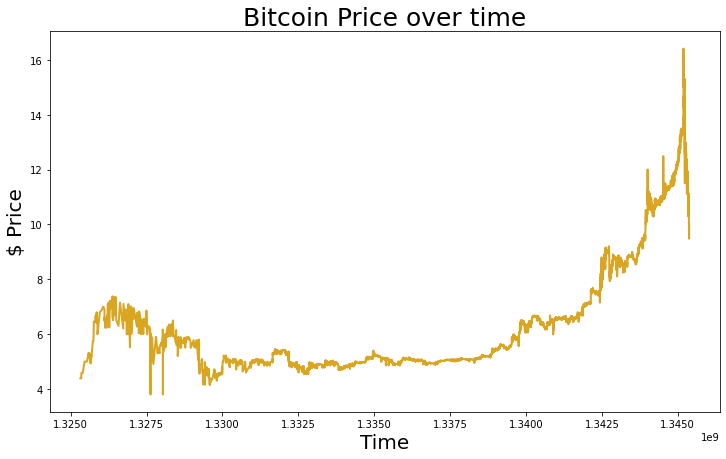

In [209]:
plt.figure(figsize = (12, 7)).patch.set_facecolor('white')
plt.plot(df["Timestamp"], df["Open"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

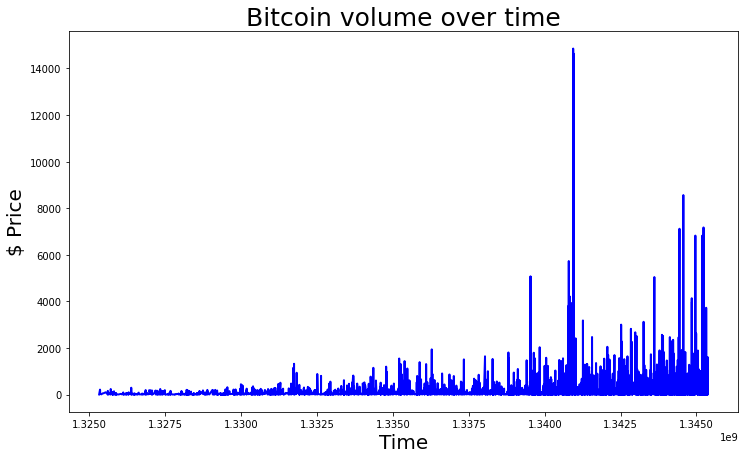

In [210]:
plt.figure(figsize = (12, 7)).patch.set_facecolor('white')
plt.plot(df["Timestamp"], df["Volume_(Currency)"], color='blue', lw=2)
plt.title("Bitcoin volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

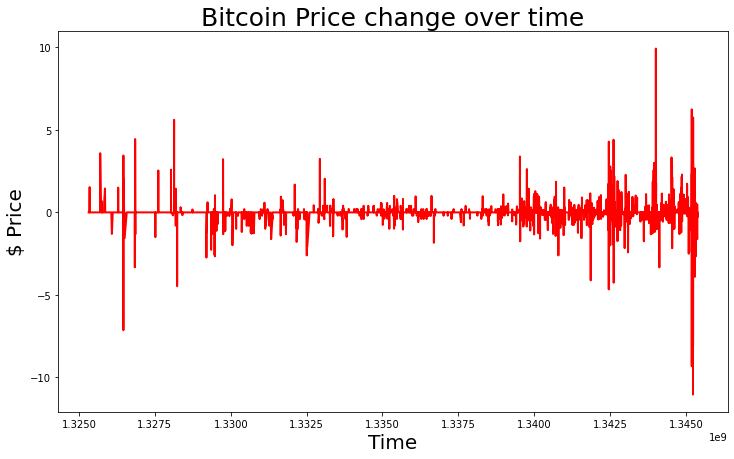

In [211]:
plt.figure(figsize = (12, 7)).patch.set_facecolor('white')
plt.plot(df["Timestamp"], df["Change"], color='red', lw=2)
plt.title("Bitcoin Price change over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [212]:
required_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'

In [213]:
x_train, x_test, y_train, y_test = train_test_split(
df[required_features],
df[output_label],
test_size = 0.3
)

In [214]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [215]:
y_pred_train = model.predict(x_train)
mean_squared_error(y_train, y_pred_train)

0.00040535758145535903

In [216]:
#future_set = df.shift(periods=30).tail(30)
#prediction = model.predict(future_set[required_features])
model.fit(x_test, y_test)
y_pred_test = model.predict(x_test)


In [217]:
mean_squared_error(y_pred_test, y_test) #validation error

9.364157361522655e-05

In [218]:
print(x_test.shape, y_test.shape)

(3000, 6) (3000,)


In [219]:
#plt.scatter(x_test, y_test, color="r", s=10, label="Validation Datapoints")
#plt.show() 

In [220]:
#plt.figure(figsize = (12, 7)).patch.set_facecolor('white')
#plt.plot(df["Timestamp"][-400:-60], df["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
#plt.plot(future_set["Timestamp"], prediction, color='deeppink', lw=2)
#plt.title("Bitcoin Price over time", size=25)
#plt.xlabel("Time", size=20)
#plt.ylabel("$ Price", size=20)

In [221]:
from sklearn.preprocessing import MinMaxScaler

In [222]:
training_data, remaining = np.split(df, [int(.4*len(df))])

test_data, final_test_data = np.split(remaining, [int(.5*len(remaining))])
print(training_data.shape,test_data.shape, final_test_data.shape)

(4000, 10) (3000, 10) (3000, 10)


In [223]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(training_data.drop(columns=['Timestamp','Dates']))
scaled_test = scaler.fit_transform(test_data.drop(columns=['Timestamp','Dates']))
scaled_final_test = scaler.fit_transform(final_test_data.drop(columns=['Timestamp','Dates']))



scaled_train.shape

(4000, 8)

In [224]:
X_train = [] 
Y_train = []

scaled_train.shape[0]
for i in range(0, scaled_train.shape[0]):
    Y_train.append(scaled_train[i][3])
    X_train.append(np.delete(scaled_train[i],3))
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_train.shape

(4000, 7, 1)

In [225]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50,  activation = 'relu', input_shape=(X_train.shape[1], 1), return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 7, 50)             10400     
                                                                 
 dropout_16 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_17 (LSTM)              (None, 7, 60)             26640     
                                                                 
 dropout_17 (Dropout)        (None, 7, 60)             0         
                                                                 
 lstm_18 (LSTM)              (None, 7, 80)             45120     
                                                                 
 dropout_18 (Dropout)        (None, 7, 80)             0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [226]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
72/72 [==============================] - 20s 51ms/step - loss: 0.0443 - val_loss: 0.0087
Epoch 2/20
72/72 [==============================] - 2s 33ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 3/20
72/72 [==============================] - 2s 27ms/step - loss: 0.0050 - val_loss: 8.0750e-04
Epoch 4/20
72/72 [==============================] - 2s 25ms/step - loss: 0.0043 - val_loss: 7.1556e-04
Epoch 5/20
72/72 [==============================] - 2s 25ms/step - loss: 0.0039 - val_loss: 6.5162e-04
Epoch 6/20
72/72 [==============================] - 2s 27ms/step - loss: 0.0036 - val_loss: 4.9836e-04
Epoch 7/20
72/72 [==============================] - 2s 27ms/step - loss: 0.0033 - val_loss: 4.8097e-04
Epoch 8/20
72/72 [==============================] - 2s 24ms/step - loss: 0.0034 - val_loss: 7.8280e-04
Epoch 9/20
72/72 [==============================] - 2s 26ms/step - loss: 0.0033 - val_loss: 8.3077e-04
Epoch 10/20
72/72 [==============================] - 2s 25ms/step - loss: 0.0030

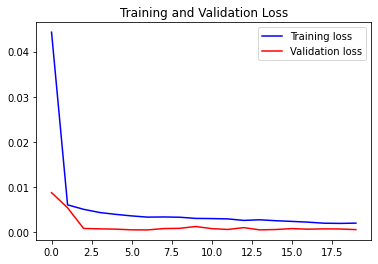

In [227]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure().patch.set_facecolor('white')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [238]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['val_loss']))

0.00522219953709282
0.0013445302000036463


In [228]:
X_test = [] 
Y_test = []

scaled_test.shape[0]
for i in range(0, scaled_test.shape[0]):
    Y_test.append(scaled_test[i][3])
    X_test.append(np.delete(scaled_test[i],3))

X_test, Y_test = np.array(X_test), np.array(Y_test) 

print(X_test.shape, Y_test.shape)
Y_pred = model.predict(X_test)
Y_pred, Y_test
scaler.scale_
    


(3000, 7) (3000,)


array([1.20336943e-01, 1.20336943e-01, 1.35317997e-01, 1.26582278e-01,
       1.27382901e-03, 1.16792650e-04, 1.20677216e-01, 4.76710432e-02])

In [229]:
scale = 1/1.20336943e-01
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred

array([[1.7972735],
       [1.7971922],
       [1.797964 ],
       ...,
       [5.95718  ],
       [5.9843698],
       [6.0056887]], dtype=float32)

In [230]:
Y_test

array([0.6638843 , 0.64099174, 0.86991736, ..., 6.02074382, 6.08942151,
       6.11231407])

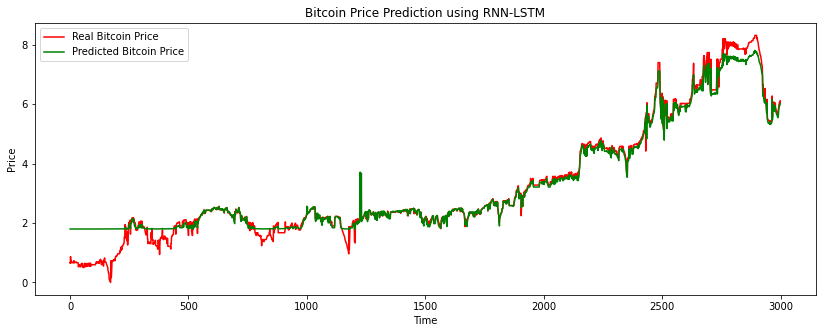

In [231]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [235]:
X_final_test = [] 
Y_final_test = []

scaled_final_test.shape[0]
for i in range(0, scaled_final_test.shape[0]):
    Y_final_test.append(scaled_final_test[i][3])
    X_final_test.append(np.delete(scaled_final_test[i],3))

X_final_test, Y_final_test = np.array(X_final_test), np.array(Y_final_test) 

print(X_final_test.shape, Y_final_test.shape)
Y_final_pred = model.predict(X_final_test)
Y_final_pred,Y_final_test
scaler.scale_

(3000, 7) (3000,)


array([1.20336943e-01, 1.20336943e-01, 1.35317997e-01, 1.26582278e-01,
       1.27382901e-03, 1.16792650e-04, 1.20677216e-01, 4.76710432e-02])

In [236]:
scale = 1/1.20336943e-01
Y_final_test = Y_final_test*scale 
Y_final_pred = Y_final_pred*scale
Y_final_pred

array([[1.7985064],
       [1.7984594],
       [1.7984685],
       ...,
       [1.8217988],
       [1.8217176],
       [1.8550766]], dtype=float32)

In [253]:
Y_final_pred.shape, Y_final_test.shape


((3000, 1), (3000,))

In [252]:
mean_squared_error(Y_final_test, Y_final_pred)

0.44508651793749004